## Predict Cancer mortality rates for United States Counties - EDA

## 1. Introduction

### 1.1 What is cancer mortality rates?

- Cancer mortality is the number of deaths due to cancer in a specified population in a given time (typically 1 year)


### 1.2 What is OLS Regression Challenge?

- In this challenge, the aim is to build a multivariate ordinary least square regression model to predict cancer mortality rates for US Counties

## 2. Importing necessary libraries

In [ ]:
import pandas as pd 
import numpy as np

## 3. Reading the train.csv

In [15]:
data = pd.read_csv("/Users/phanindrakumar/Desktop/OLSRegressionChallenge/ols_regression_data/data/cancer_reg_utf8.csv")
data.head()

avgAnnCount  avgDeathsPerYear  TARGET_deathRate  incidenceRate  medIncome  \
0       1397.0               469             164.9          489.8      61898   
1        173.0                70             161.3          411.6      48127   
2        102.0                50             174.7          349.7      49348   
3        427.0               202             194.8          430.4      44243   
4         57.0                26             144.4          350.1      49955   

   popEst2015  povertyPercent  studyPerCap           binnedInc  MedianAge  \
0      260131            11.2   499.748204   (61494.5, 125635]       39.3   
1       43269            18.6    23.111234  (48021.6, 51046.4]       33.0   
2       21026            14.6    47.560164  (48021.6, 51046.4]       45.0   
3       75882            17.1   342.637253    (42724.4, 45201]       42.8   
4       10321            12.5     0.000000  (48021.6, 51046.4]       48.3   

   MedianAgeMale  MedianAgeFemale                     Geography  \
0           36.9             41.7     Kitsap County, Washington   
1           32.2             33.7   Kittitas County, Washington   
2           44.0             45.8  Klickitat County, Washington   
3           42.2             43.4      Lewis County, Washington   
4           47.8             48.9    Lincoln County, Washington   

   AvgHouseholdSize  PercentMarried  PctNoHS18_24  PctHS18_24  \
0              2.54            52.5          11.5        39.5   
1              2.34            44.5           6.1        22.4   
2              2.62            54.2          24.0        36.6   
3              2.52            52.7          20.2        41.2   
4              2.34            57.8          14.9        43.0   

   PctSomeCol18_24  PctBachDeg18_24  PctHS25_Over  PctBachDeg25_Over  \
0             42.1              6.9          23.2               19.6   
1             64.0              7.5          26.0               22.7   
2              NaN              9.5          29.0               16.0   
3             36.1              2.5          31.6                9.3   
4             40.0              2.0          33.4               15.0   

   PctEmployed16_Over  PctUnemployed16_Over  PctPrivateCoverage  \
0                51.9                   8.0                75.1   
1                55.9                   7.8                70.2   
2                45.9                   7.0                63.7   
3                48.3                  12.1                58.4   
4                48.2                   4.8                61.6   

   PctPrivateCoverageAlone  PctEmpPrivCoverage  PctPublicCoverage  \
0                      NaN                41.6               32.9   
1                     53.8                43.6               31.1   
2                     43.5                34.9               42.1   
3                     40.3                35.0               45.3   
4                     43.9                35.1               44.0   

   PctPublicCoverageAlone   PctWhite  PctBlack  PctAsian  PctOtherRace  \
0                    14.0  81.780529  2.594728  4.821857      1.843479   
1                    15.3  89.228509  0.969102  2.246233      3.741352   
2                    21.1  90.922190  0.739673  0.465898      2.747358   
3                    25.0  91.744686  0.782626  1.161359      1.362643   
4                    22.7  94.104024  0.270192  0.665830      0.492135   

   PctMarriedHouseholds  BirthRate  
0             52.856076   6.118831  
1             45.372500   4.333096  
2             54.444868   3.729488  
3             51.021514   4.603841  
4             54.027460   6.796657

In [4]:
pd.set_option('display.max_columns',  None)

## 4. Data Exploration

In [5]:
print(data.info())
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

avgAnnCount  avgDeathsPerYear  TARGET_deathRate  incidenceRate  \
count   3047.000000       3047.000000       3047.000000    3047.000000   
mean     606.338544        185.965868        178.664063     448.268586   
std     1416.356223        504.134286         27.751511      54.560733   
min        6.000000          3.000000         59.700000     201.300000   
25%       76.000000         28.000000        161.200000     420.300000   
50%      171.000000         61.000000        178.100000     453.549422   
75%      518.000000        149.000000        195.200000     480.850000   
max    38150.000000      14010.000000        362.800000    1206.900000   

           medIncome    popEst2015  povertyPercent  studyPerCap    MedianAge  \
count    3047.000000  3.047000e+03     3047.000000  3047.000000  3047.000000   
mean    47063.281917  1.026374e+05       16.878175   155.399415    45.272333   
std     12040.090836  3.290592e+05        6.409087   529.628366    45.304480   
min     22640.000000  8.270000e+02        3.200000     0.000000    22.300000   
25%     38882.500000  1.168400e+04       12.150000     0.000000    37.700000   
50%     45207.000000  2.664300e+04       15.900000     0.000000    41.000000   
75%     52492.000000  6.867100e+04       20.400000    83.650776    44.000000   
max    125635.000000  1.017029e+07       47.400000  9762.308998   624.000000   

       MedianAgeMale  MedianAgeFemale  AvgHouseholdSize  PercentMarried  \
count    3047.000000      3047.000000       3047.000000     3047.000000   
mean       39.570725        42.145323          2.479662       51.773679   
std         5.226017         5.292849          0.429174        6.896928   
min        22.400000        22.300000          0.022100       23.100000   
25%        36.350000        39.100000          2.370000       47.750000   
50%        39.600000        42.400000          2.500000       52.400000   
75%        42.500000        45.300000          2.630000       56.400000   
max        64.700000        65.700000          3.970000       72.500000   

       PctNoHS18_24   PctHS18_24  PctSomeCol18_24  PctBachDeg18_24  \
count   3047.000000  3047.000000       762.000000      3047.000000   
mean      18.224450    35.002068        40.977034         6.158287   
std        8.093064     9.069722        11.115805         4.529059   
min        0.000000     0.000000         7.100000         0.000000   
25%       12.800000    29.200000        34.000000         3.100000   
50%       17.100000    34.700000        40.400000         5.400000   
75%       22.700000    40.700000        46.400000         8.200000   
max       64.100000    72.500000        79.000000        51.800000   

       PctHS25_Over  PctBachDeg25_Over  PctEmployed16_Over  \
count   3047.000000        3047.000000         2895.000000   
mean      34.804660          13.282015           54.152642   
std        7.034924           5.394756            8.315064   
min        7.500000           2.500000           17.600000   
25%       30.400000           9.400000           48.600000   
50%       35.300000          12.300000           54.500000   
75%       39.650000          16.100000           60.300000   
max       54.800000          42.200000           80.100000   

       PctUnemployed16_Over  PctPrivateCoverage  PctPrivateCoverageAlone  \
count           3047.000000         3047.000000              2438.000000   
mean               7.852412           64.354939                48.453774   
std                3.452371           10.647057                10.083006   
min                0.400000           22.300000                15.700000   
25%                5.500000           57.200000                41.000000   
50%                7.600000           65.100000                48.700000   
75%                9.700000           72.100000                55.600000   
max               29.400000           92.300000                78.900000   

       PctEmpPrivCoverage  PctPublicCoverage  PctPublicCoverageAlone 

### Missing values

In [22]:
null_values  = data.isnull().sum()
null_values[null_values>0]


PctSomeCol18_24            2285
PctEmployed16_Over          152
PctPrivateCoverageAlone     609
dtype: int64

In [81]:
data.columns

Index(['avgAnnCount', 'avgDeathsPerYear', 'TARGET_deathRate', 'incidenceRate',
       'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'binnedInc',
       'MedianAge', 'MedianAgeMale', 'MedianAgeFemale', 'Geography',
       'AvgHouseholdSize', 'PercentMarried', 'PctNoHS18_24', 'PctHS18_24',
       'PctSomeCol18_24', 'PctBachDeg18_24', 'PctHS25_Over',
       'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctUnemployed16_Over',
       'PctPrivateCoverage', 'PctPrivateCoverageAlone', 'PctEmpPrivCoverage',
       'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctWhite', 'PctBlack',
       'PctAsian', 'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate'],
      dtype='object')

## 4. Analyzing variables

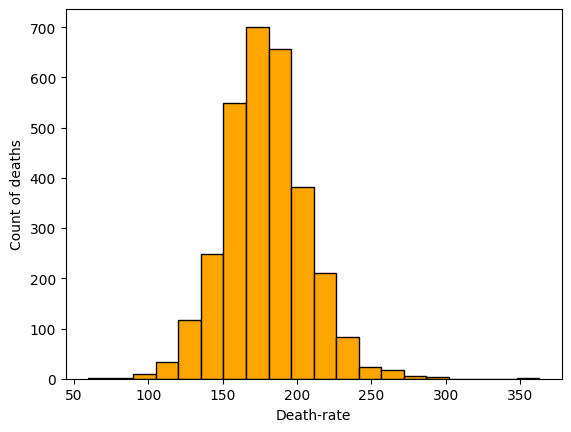

In [7]:
import matplotlib.pyplot as plt
data_to_plot = data['TARGET_deathRate']
plt.hist(data_to_plot, bins=20, color='orange', edgecolor = 'black')
plt.xlabel('Death-rate')
plt.ylabel('Count of deaths')
plt.show()

Interpretation of Histogram

In [27]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Box(y=data['TARGET_deathRate'],boxpoints='outliers', jitter=0.3, pointpos=1.8)])
fig.update_layout (
    title = 'Boxplot of death rate',
    yaxis_title = 'Death rate',
    width = 700,
    height = 500)
fig.show()

Mean of avgAnnCount: 606.3385437820807
Standard deviation of avgAnnCount: 1416.3562232267052


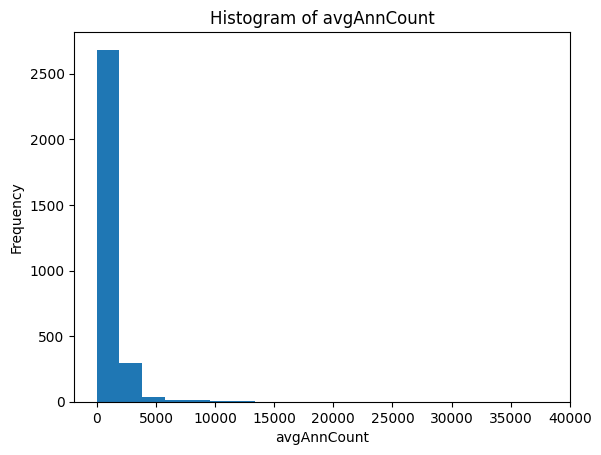

Correlation between avgAnnCount and TARGET_deathRate: -0.14353161968868813


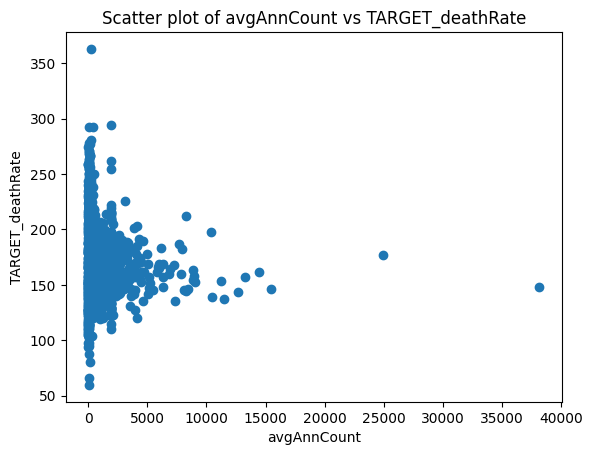

In [10]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import pandas as pd

# Calculate mean and standard deviation of avgAnnCount
avg_ann_count_mean = data["avgAnnCount"].mean()
avg_ann_count_std = data["avgAnnCount"].std()
print("Mean of avgAnnCount:", avg_ann_count_mean)
print("Standard deviation of avgAnnCount:", avg_ann_count_std)

# Create a histogram to visualize the distribution of avgAnnCount
plt.hist(data["avgAnnCount"], bins=20)
plt.xlabel("avgAnnCount")
plt.ylabel("Frequency")
plt.title("Histogram of avgAnnCount")
plt.show()

# Create a boxplot to visualize the distribution of avgAnnCount
fig = go.Figure(data=[go.Box(y=data["avgAnnCount"], boxpoints='outliers', jitter=0.3, pointpos=1.8)])
fig.update_layout(
    title='Boxplot of avgAnnCount',
    yaxis_title='avgAnnCount',
    width=700,
    height=500
)
fig.show()

# Calculate the correlation between avgAnnCount and TARGET_deathRate
corr = data["avgAnnCount"].corr(data["TARGET_deathRate"])
print("Correlation between avgAnnCount and TARGET_deathRate:", corr)

# Create a scatter plot to visualize the relationship between avgAnnCount and TARGET_deathRate
plt.scatter(data["avgAnnCount"], data["TARGET_deathRate"])
plt.xlabel("avgAnnCount")
plt.ylabel("TARGET_deathRate")
plt.title("Scatter plot of avgAnnCount vs TARGET_deathRate")
plt.show()


* Mean: The mean of avgAnCount is 606.34, which tells us that on average, there were 606 cases of cancer diagnosed annually per county in the dataset.

* Standard deviation: The standard deviation of avgAnnCount is 1416.36, which tells us how spread out the data is. In this case, it indicates that the data is quite spread out, with some counties having relatively low numbers of cancer diagnoses annually and some having relatively high numbers. This is further confirmed by the histogram or boxplot that shows the distribution of avgAnnCount.

* Correlation: The correlation between avgAnnCount and TARGET_deathRate is -0.14, which tells us the strength and direction of the liner relationship between the two variables. A correlation value ranges between -1 and 1. A correlation of -1 means that there is a perfect negative linear relationship between the two variables, which means that as one variable increases, the other variable decreases. A correlation of 1 means that there is a perfect positive linear relationship between the two variables, which means that as one variable increases, the other variable also increases. A correlation of 0 means that there is no linear relationship between the two variables.

### Dealing with missing values

In [11]:
missing_values = data.isnull().sum()
print(missing_values[missing_values>0])

PctSomeCol18_24            2285
PctEmployed16_Over          152
PctPrivateCoverageAlone     609
dtype: int64


In [52]:
processed_data = pd.read_csv('/Users/phanindrakumar/Desktop/OLSRegressionChallenge/cancer_reg_processed.csv')
processed_data.head()

avgAnnCount  avgDeathsPerYear  TARGET_deathRate  incidenceRate  medIncome  \
0       1397.0               469             164.9          489.8      61898   
1        173.0                70             161.3          411.6      48127   
2        102.0                50             174.7          349.7      49348   
3        427.0               202             194.8          430.4      44243   
4         57.0                26             144.4          350.1      49955   

   popEst2015  povertyPercent  studyPerCap  MedianAge  MedianAgeMale  \
0      260131            11.2   499.748204       39.3           36.9   
1       43269            18.6    23.111234       33.0           32.2   
2       21026            14.6    47.560164       45.0           44.0   
3       75882            17.1   342.637253       42.8           42.2   
4       10321            12.5     0.000000       48.3           47.8   

   MedianAgeFemale  AvgHouseholdSize  PercentMarried  PctNoHS18_24  \
0             41.7              2.54            52.5          11.5   
1             33.7              2.34            44.5           6.1   
2             45.8              2.62            54.2          24.0   
3             43.4              2.52            52.7          20.2   
4             48.9              2.34            57.8          14.9   

   PctHS18_24  PctBachDeg18_24  PctHS25_Over  PctBachDeg25_Over  \
0        39.5              6.9          23.2               19.6   
1        22.4              7.5          26.0               22.7   
2        36.6              9.5          29.0               16.0   
3        41.2              2.5          31.6                9.3   
4        43.0              2.0          33.4               15.0   

   PctEmployed16_Over  PctUnemployed16_Over  PctPrivateCoverage  \
0                51.9                   8.0                75.1   
1                55.9                   7.8                70.2   
2                45.9                   7.0                63.7   
3                48.3                  12.1                58.4   
4                48.2                   4.8                61.6   

   PctPrivateCoverageAlone  PctEmpPrivCoverage  PctPublicCoverage  \
0                48.453774                41.6               32.9   
1                53.800000                43.6               31.1   
2                43.500000                34.9               42.1   
3                40.300000                35.0               45.3   
4                43.900000                35.1               44.0   

   PctPublicCoverageAlone   PctWhite  PctBlack  PctAsian  PctOtherRace  \
0                    14.0  81.780529  2.594728  4.821857      1.843479   
1                    15.3  89.228509  0.969102  2.246233      3.741352   
2                    21.1  90.922190  0.739673  0.465898      2.747358   
3                    25.0  91.744686  0.782626  1.161359      1.362643   
4                    22.7  94.104024  0.270192  0.665830      0.492135   

   PctMarriedHouseholds  BirthRate  lower_bound  upper_bound    median  \
0             52.856076   6.118831      61494.5     125635.0  93564.75   
1             45.372500   4.333096      48021.6      51046.4  49534.00   
2             54.444868   3.729488      48021.6      51046.4  49534.00   
3             51.021514   4.603841      42724.4      45201.0  43962.70   
4             54.027460   6.796657      48021.6      51046.4  49534.00   

   county_Abbeville County  county_Acadia Parish  county_Accomack County  \
0                      0.0                   0.0                     0.0   
1                      0.0                   0.0                     0.0   
2                      0.0                   0.0                     0.0   
3                      0.0                   0.0                     0.0   
4                      0.0                   0.0                     0.0   

   county_Ada County  county_Adair County  county_Adams County  \
0                0.0              

In [57]:
from scipy.stats import normaltest
numerical_columns = processed_data.select_dtypes(include=np.number).columns
gaussian_cols = []
non_gaussian_cols = []
for col in numerical_columns:
    stat, p = normaltest (processed_data[col])
    print( 'Statistics=%.3f, p=%.3f' % (stat, p))
    alpha = 0.05
    if p > alpha:
        gaussian_cols.append(col)
    else:
        non_gaussian_cols.append(col)
print(gaussian_cols)

Statistics=5028.465, p=0.000
Statistics=5314.434, p=0.000
Statistics=127.363, p=0.000
Statistics=943.641, p=0.000
Statistics=854.431, p=0.000
Statistics=5801.694, p=0.000
Statistics=408.566, p=0.000
Statistics=4449.679, p=0.000
Statistics=4715.992, p=0.000
Statistics=42.880, p=0.000
Statistics=48.305, p=0.000
Statistics=2293.395, p=0.000
Statistics=236.299, p=0.000
Statistics=508.655, p=0.000
Statistics=39.668, p=0.000
Statistics=1395.030, p=0.000
Statistics=55.596, p=0.000
Statistics=536.946, p=0.000
Statistics=87.619, p=0.000
Statistics=471.048, p=0.000
Statistics=73.543, p=0.000
Statistics=9.139, p=0.010
Statistics=20.036, p=0.000
Statistics=1.039, p=0.595
Statistics=114.894, p=0.000
Statistics=933.419, p=0.000
Statistics=1377.835, p=0.000
Statistics=4033.108, p=0.000
Statistics=3071.494, p=0.000
Statistics=218.834, p=0.000
Statistics=893.748, p=0.000
Statistics=55.722, p=0.000
Statistics=1290.293, p=0.000
Statistics=847.167, p=0.000
Statistics=10017.746, p=0.000
Statistics=10017.74

TypeError: 'Axes' object is not subscriptable

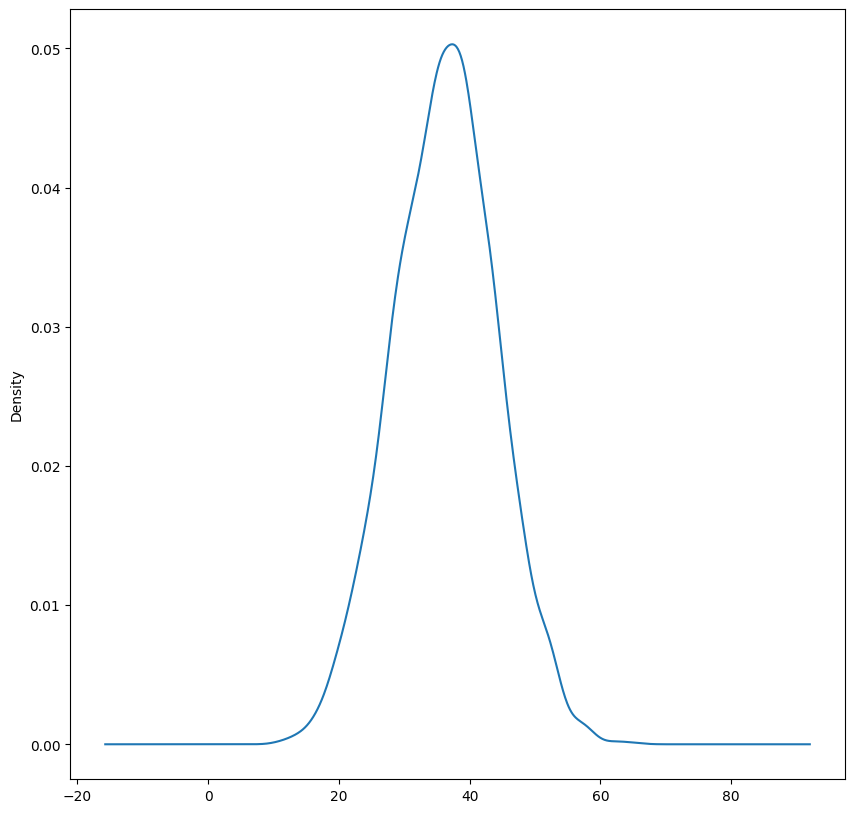

In [58]:
# Make subplots for all Gaussian columns as density plots
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

for i, col in enumerate(gaussian_cols):
    processed_data[col].plot(kind='density', ax=axes,subplots = True, sharex=False)
    axes[i].set_title(f'Density Plot: {col}')

plt.tight_layout()
plt.show()

In [59]:
gaussian_data = processed_data[gaussian_cols]
basic_info_gaussian = gaussian_data.describe()

In [60]:
gaussian_data

PctPublicCoverage
0                  32.9
1                  31.1
2                  42.1
3                  45.3
4                  44.0
...                 ...
3042               31.7
3043               28.8
3044               26.6
3045               29.5
3046               25.1

[3047 rows x 1 columns]

In [61]:
basic_info_gaussian = basic_info_gaussian.loc[['mean', 'std','min', 'max']]
basic_info_gaussian

PctPublicCoverage
mean          36.252642
std            7.841741
min           11.200000
max           65.100000

In [63]:
print("Highest allowed", basic_info_gaussian["PctPublicCoverage"]["mean"]+ 3* basic_info_gaussian['PctPublicCoverage']["std"])
print("Lowest allowed", basic_info_gaussian["PctPublicCoverage"]["mean"]- 3* basic_info_gaussian['PctPublicCoverage']["std"])

processed_data[(processed_data['PctPublicCoverage']>59.777864755203105) | (processed_data['PctPublicCoverage'] < 12.727419130586192)]

Highest allowed 59.777864755203105
Lowest allowed 12.727419130586192


avgAnnCount  avgDeathsPerYear  TARGET_deathRate  incidenceRate  \
176          25.0                10             134.3          359.0   
209         862.0               283             136.5          364.9   
1486       1067.0               358             142.9          444.5   
2713          8.0                 3             203.3          201.3   
2740        129.0                54             126.1          332.0   

      medIncome  popEst2015  povertyPercent  studyPerCap  MedianAge  \
176       27627        4596            24.2     0.000000       42.6   
209      122641      375629             3.9   449.912014       35.3   
1486      51907      118891            10.9    84.110656       65.3   
2713      68387        5702             9.9     0.000000       36.8   
2740      32533       20152            22.8     0.000000       54.8   

      MedianAgeMale  MedianAgeFemale  AvgHouseholdSize  PercentMarried  \
176            44.0             42.6              2.81            41.2   
209            34.9             35.6              3.08            61.2   
1486           64.7             65.7              2.05            62.6   
2713           38.8             32.9              3.59            40.6   
2740           54.8             54.9              2.14            54.1   

      PctNoHS18_24  PctHS18_24  PctBachDeg18_24  PctHS25_Over  \
176           12.8        10.6             27.4          35.6   
209           16.6        26.5             17.1          13.8   
1486          34.6        39.4              2.5          30.6   
2713          11.3        52.1              7.0          37.0   
2740          26.3        40.4              0.0          36.6   

      PctBachDeg25_Over  PctEmployed16_Over  PctUnemployed16_Over  \
176                 6.8                31.9                   5.4   
209                34.8                72.6                   4.0   
1486               16.3                22.1                   9.0   
2713               10.3                80.1                   2.1   
2740                6.4                37.0                  11.2   

      PctPrivateCoverage  PctPrivateCoverageAlone  PctEmpPrivCoverage  \
176                 27.8                16.800000                14.3   
209                 86.9                77.100000                68.9   
1486                66.6                48.453774                18.8   
2713                69.1                60.400000                58.3   
2740                50.3                23.700000                20.9   

      PctPublicCoverage  PctPublicCoverageAlone   PctWhite  PctBlack  \
176                62.7                    46.6  63.648069  0.128755   
209                11.8                     4.6  67.770250  7.432026   
1486               65.1                    21.8  88.341121  8.341859   
2713               11.2                     6.2  31.562280  4.732583   
2740               62.2                    31.3  73.926727  0.196705   

       PctAsian  PctOtherRace  PctMarriedHouseholds  BirthRate  lower_bound  \
176    0.000000     35.579399             43.349456   1.084813      22640.0   
209   16.200029      3.625733             65.513259   6.198748      61494.5   
1486   0.715201      0.957595             61.945503   6.766414      51046.4   
2713  37.156932      5.295567             42.882250   4.391052      61494.5   
2740   0.826162      8.984509             46.567005   4.686490      22640.0   

      upper_bound    median  county_Abbeville County  county_Acadia Parish  \
176       34218.1  28429.05                      0.0                   0.0   
209      125635.0  93564.75                      0.0                   0.0   
1486      54545.6  52796.00                      0.0                   0.0   
2713     125635.0  93564.75                      0.0                   0.0   
2740      34218.1  28429.05                      0.0                   0.0   

      county_Accomack County  county_Ada County  county_Adair County  \
176    

In [64]:
def deal_with_outliers(df, col, basic_info):
    highest_allowed = basic_info[col]["mean"] + 3 * basic_info[col]["std"]
    lowest_allowed = basic_info[col]["mean"] - 3 * basic_info[col]["std"]
    df = df[(df[col] > highest_allowed) | (df[col] < lowest_allowed)]
    return df

cols_have_outliers = []

for col in gaussian_cols:
    df = deal_with_outliers(gaussian_data, col, basic_info_gaussian)
    shape = df.shape
    if shape[0] > 0:
        cols_have_outliers.append(col)

print(cols_have_outliers)

['PctPublicCoverage']


In [72]:
# Trimming
for col in cols_have_outliers:
    highest_allowed = basic_info_gaussian[col]["mean"] + 3 * basic_info_gaussian[col]["std"]
    lowest_allowed = basic_info_gaussian[col]["mean"] - 3 * basic_info_gaussian[col]["std"]
    
    trimmed_data = processed_data[
        (processed_data[col] < highest_allowed) & 
        (processed_data[col] > lowest_allowed)
    ]

trimmed_data


avgAnnCount  avgDeathsPerYear  TARGET_deathRate  incidenceRate  \
0     1397.000000               469             164.9     489.800000   
1      173.000000                70             161.3     411.600000   
2      102.000000                50             174.7     349.700000   
3      427.000000               202             194.8     430.400000   
4       57.000000                26             144.4     350.100000   
...           ...               ...               ...            ...   
3042  1962.667684                15             149.6     453.549422   
3043  1962.667684                43             150.1     453.549422   
3044  1962.667684                46             153.9     453.549422   
3045  1962.667684                52             175.0     453.549422   
3046  1962.667684                48             213.6     453.549422   

      medIncome  popEst2015  povertyPercent  studyPerCap  MedianAge  \
0         61898      260131            11.2   499.748204       39.3   
1         48127       43269            18.6    23.111234       33.0   
2         49348       21026            14.6    47.560164       45.0   
3         44243       75882            17.1   342.637253       42.8   
4         49955       10321            12.5     0.000000       48.3   
...         ...         ...             ...          ...        ...   
3042      46961        6343            12.4     0.000000       44.2   
3043      48609       37118            18.8   377.175494       30.4   
3044      51144       34536            15.0  1968.959926       30.9   
3045      50745       25609            13.3     0.000000       39.0   
3046      41193       37030            13.9     0.000000       26.2   

      MedianAgeMale  MedianAgeFemale  AvgHouseholdSize  PercentMarried  \
0              36.9             41.7              2.54            52.5   
1              32.2             33.7              2.34            44.5   
2              44.0             45.8              2.62            54.2   
3              42.2             43.4              2.52            52.7   
4              47.8             48.9              2.34            57.8   
...             ...              ...               ...             ...   
3042           41.1             48.8              2.08            51.0   
3043           29.3             31.4              2.90            52.6   
3044           30.5             31.2              3.04            54.8   
3045           36.9             40.5              2.56            58.8   
3046           25.5             27.0              2.83            59.5   

      PctNoHS18_24  PctHS18_24  PctBachDeg18_24  PctHS25_Over  \
0             11.5        39.5              6.9          23.2   
1              6.1        22.4              7.5          26.0   
2             24.0        36.6              9.5          29.0   
3             20.2        41.2              2.5          31.6   
4             14.9        43.0              2.0          33.4   
...            ...         ...              ...           ...   
3042          20.9        27.9              8.4          32.2   
3043          26.7        33.9              3.8          23.1   
3044          19.7        44.5              2.5          23.0   
3045          10.9        37.2              4.1          36.1   
3046           8.0        43.3              4.8          29.8   

      PctBachDeg25_Over  PctEmployed16_Over  PctUnemployed16_Over  \
0                  19.6           51.900000                   8.0   
1                  22.7           55.900000                   7.8   
2                  16.0           45.900000                   7.0   
3                   9.3           48.300000                  12.1   
4                  15.0           48.200000                   4.8   
...                 ...                 ...                   ...   
3042               15.2           51.700000                   4.3   
3043               12.4           70.100000                   4.6 

In [73]:
processed_data.shape

(3047, 1904)

In [74]:
# Capping outliers based on mean ± 3*std


for col in cols_have_outliers:
    highest_allowed = basic_info_gaussian[col]["mean"] + 3 * basic_info_gaussian[col]["std"]
    lowest_allowed = basic_info_gaussian[col]["mean"] - 3 * basic_info_gaussian[col]["std"]
    capped_data = processed_data.copy()
    # Cap values above the highest allowed
    capped_data.loc[capped_data[col] > highest_allowed, col] = highest_allowed
    
    # Cap values below the lowest allowed
    capped_data.loc[capped_data[col] < lowest_allowed, col] = lowest_allowed

capped_data


avgAnnCount  avgDeathsPerYear  TARGET_deathRate  incidenceRate  \
0     1397.000000               469             164.9     489.800000   
1      173.000000                70             161.3     411.600000   
2      102.000000                50             174.7     349.700000   
3      427.000000               202             194.8     430.400000   
4       57.000000                26             144.4     350.100000   
...           ...               ...               ...            ...   
3042  1962.667684                15             149.6     453.549422   
3043  1962.667684                43             150.1     453.549422   
3044  1962.667684                46             153.9     453.549422   
3045  1962.667684                52             175.0     453.549422   
3046  1962.667684                48             213.6     453.549422   

      medIncome  popEst2015  povertyPercent  studyPerCap  MedianAge  \
0         61898      260131            11.2   499.748204       39.3   
1         48127       43269            18.6    23.111234       33.0   
2         49348       21026            14.6    47.560164       45.0   
3         44243       75882            17.1   342.637253       42.8   
4         49955       10321            12.5     0.000000       48.3   
...         ...         ...             ...          ...        ...   
3042      46961        6343            12.4     0.000000       44.2   
3043      48609       37118            18.8   377.175494       30.4   
3044      51144       34536            15.0  1968.959926       30.9   
3045      50745       25609            13.3     0.000000       39.0   
3046      41193       37030            13.9     0.000000       26.2   

      MedianAgeMale  MedianAgeFemale  AvgHouseholdSize  PercentMarried  \
0              36.9             41.7              2.54            52.5   
1              32.2             33.7              2.34            44.5   
2              44.0             45.8              2.62            54.2   
3              42.2             43.4              2.52            52.7   
4              47.8             48.9              2.34            57.8   
...             ...              ...               ...             ...   
3042           41.1             48.8              2.08            51.0   
3043           29.3             31.4              2.90            52.6   
3044           30.5             31.2              3.04            54.8   
3045           36.9             40.5              2.56            58.8   
3046           25.5             27.0              2.83            59.5   

      PctNoHS18_24  PctHS18_24  PctBachDeg18_24  PctHS25_Over  \
0             11.5        39.5              6.9          23.2   
1              6.1        22.4              7.5          26.0   
2             24.0        36.6              9.5          29.0   
3             20.2        41.2              2.5          31.6   
4             14.9        43.0              2.0          33.4   
...            ...         ...              ...           ...   
3042          20.9        27.9              8.4          32.2   
3043          26.7        33.9              3.8          23.1   
3044          19.7        44.5              2.5          23.0   
3045          10.9        37.2              4.1          36.1   
3046           8.0        43.3              4.8          29.8   

      PctBachDeg25_Over  PctEmployed16_Over  PctUnemployed16_Over  \
0                  19.6           51.900000                   8.0   
1                  22.7           55.900000                   7.8   
2                  16.0           45.900000                   7.0   
3                   9.3           48.300000                  12.1   
4                  15.0           48.200000                   4.8   
...                 ...                 ...                   ...   
3042               15.2           51.700000                   4.3   
3043               12.4           70.100000                   4.6 

In [75]:
# Remove columns which are categorical and have less than 10 unique values
cols_to_remove = []

for col in processed_data.columns:
    if processed_data[col].nunique() < 10:
        cols_to_remove.append(col)

print(f"Number of columns to remove: {len(cols_to_remove)}")

data_for_skewness = processed_data.drop(cols_to_remove, axis=1) 


Number of columns to remove: 1870


In [76]:
def identify_skewed_cols(df, cols):
    skewed_cols = []  # Initialize an empty list to store skewed column names
    for col in cols:
        skew = df[col].skew()  # Calculate skewness for each column
        if skew > 1 or skew < -1:  # Check for high positive or negative skewness
            skewed_cols.append(col)  # Append skewed column to the list
    return skewed_cols

# Call the function to identify skewed columns
skewed_cols = identify_skewed_cols(data_for_skewness, data_for_skewness.columns)

# Print the count of skewed columns
len(skewed_cols)

16

In [77]:
skewed_data = data_for_skewness[skewed_cols]

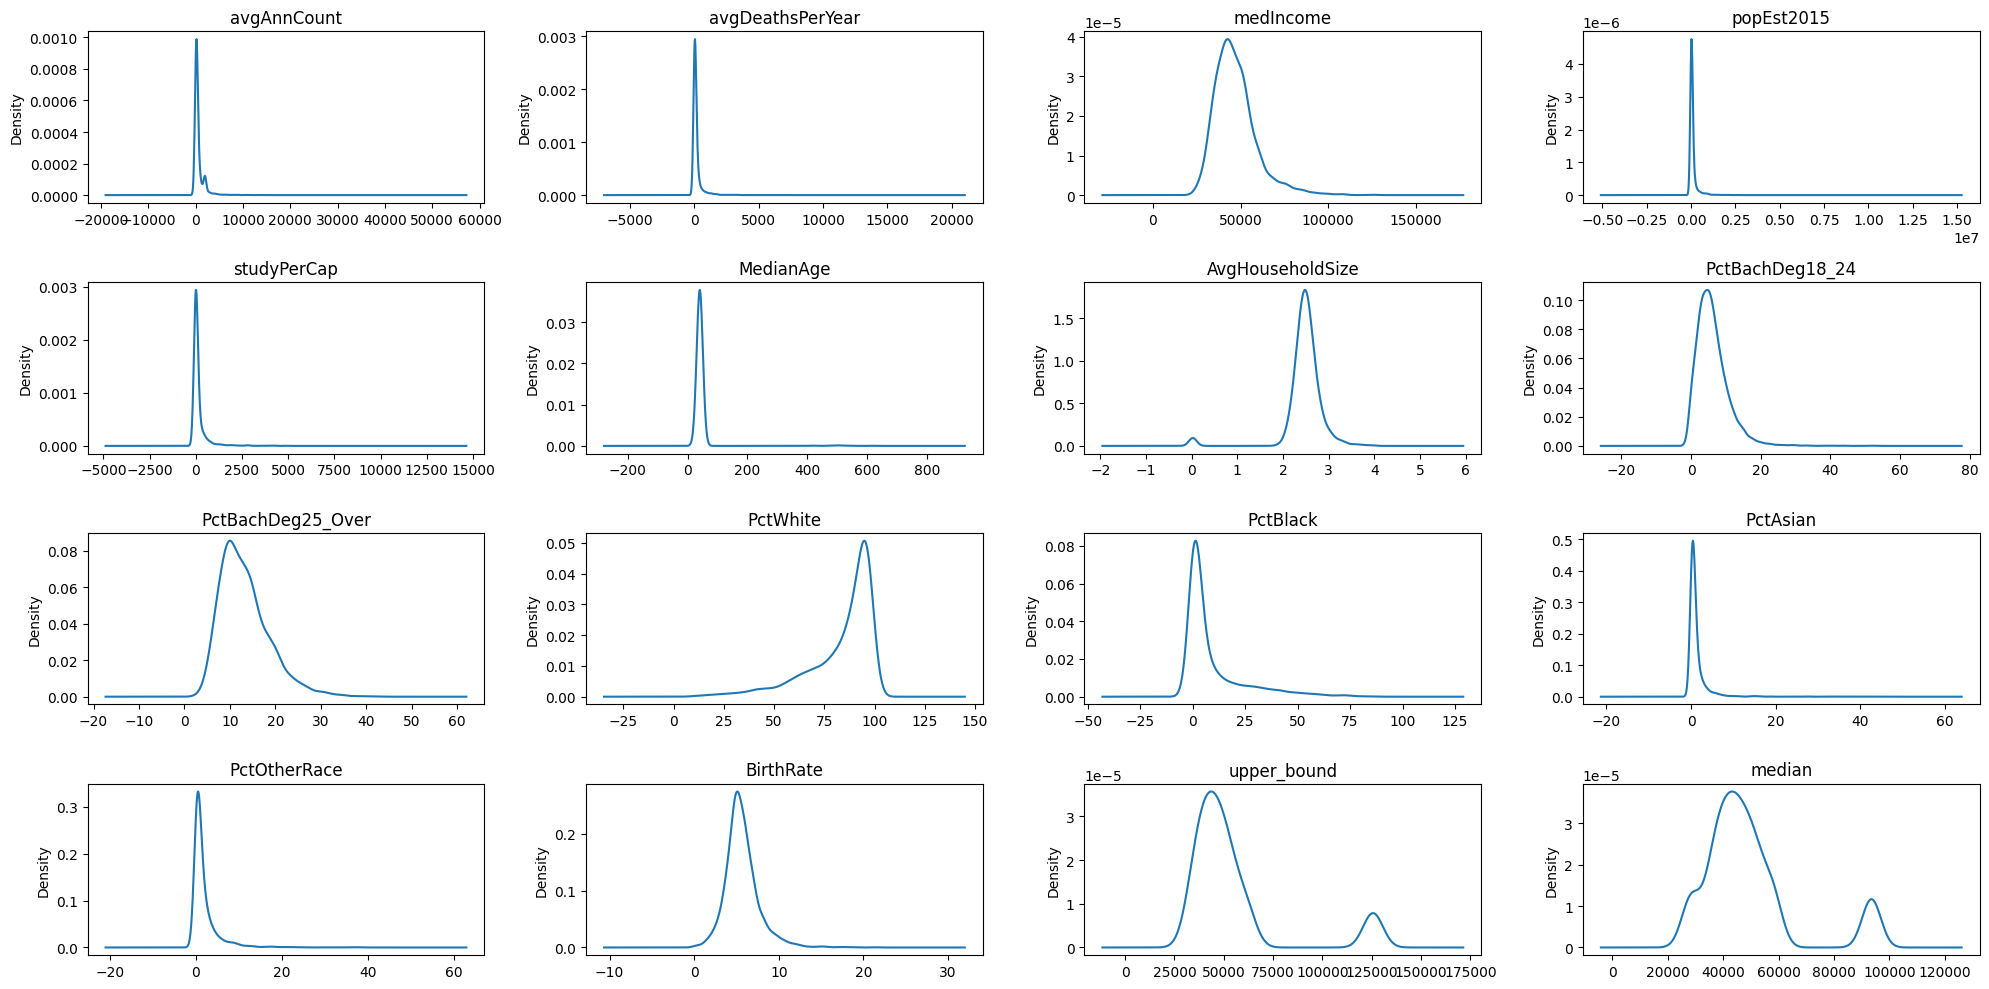

In [78]:
# Plot the distribution of the skewed columns (8 columns)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 10))  # Create 4x4 grid of subplot

for i, col in enumerate(skewed_cols):
    # Set plot title
    axes[i//4, i%4].set_title(col)
    
    # Plot density
    skewed_data[col].plot(kind='density', ax=axes[i//4, i%4], subplots = True, sharex= False)
    
plt.tight_layout()
plt.show()


In [ ]:


def box_plot(df, col):
    # Create a box plot
    fig = go.Figure(data=go.Box(y=df[col], boxpoints='outliers', jitter=0.3, pointpos=-1.8))
    
    # Update layout for better visuals
    fig.update_layout(
        title="Boxplot of " + col,
        yaxis_title=col,
        width=500,
        height=500
    )
    
    # Show the plot
    fig.show()

# Loop through the skewed columns and plot boxplots
for col in skewed_cols:
    box_plot(processed_data, col)


In [41]:
# Checking outlier values for the 'studypercap' column
percentile25 = processed_data['studypercap'].quantile(0.25)
percentile75 = processed_data['studypercap'].quantile(0.75)
iqr = percentile75 - percentile25  # Interquartile range
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print("Upper limit:", upper_limit)
print("Lower limit:", lower_limit)

# Filter rows with outliers
processed_data[(processed_data['studypercap'] > upper_limit) | 
    (processed_data['studypercap'] < lower_limit)]

Upper limit: 209.1269406875
Lower limit: -125.4761644125


avganncount  avgdeathsperyear  target_deathrate  incidencerate  \
0     1397.000000               469             164.9     489.800000   
3      427.000000               202             194.8     430.400000   
9     4025.000000              1380             177.8     510.900000   
11     740.000000               269             172.7     499.300000   
14    2265.000000               901             171.0     440.700000   
...           ...               ...               ...            ...   
3038  1962.667684               138             153.7     453.549422   
3039  1962.667684                 9             208.3     453.549422   
3041  1962.667684                48             146.4     453.549422   
3043  1962.667684                43             150.1     453.549422   
3044  1962.667684                46             153.9     453.549422   

      medincome  popest2015  povertypercent  studypercap  medianage  \
0         61898      260131            11.2   499.748204       39.3   
3         44243       75882            17.1   342.637253       42.8   
9         60397      843954            13.1   427.748432       35.8   
11        51395      121846            15.7   837.122269       41.0   
14        50083      490945            16.3   462.373586       37.2   
...         ...         ...             ...          ...        ...   
3038      49246      118053            19.4   660.720185       28.8   
3039      49256        2968            10.5   673.854447       45.2   
3041      49508       29029            13.0   723.414516       32.2   
3043      48609       37118            18.8   377.175494       30.4   
3044      51144       34536            15.0  1968.959926       30.9   

      medianagemale  medianagefemale  avghouseholdsize  percentmarried  \
0              36.9             41.7              2.54            52.5   
3              42.2             43.4              2.52            52.7   
9              34.7             37.0              2.65            50.0   
11             40.0             42.2              2.56            53.6   
14             35.7             38.7              2.45            49.4   
...             ...              ...               ...             ...   
3038           28.0             29.7              2.43            39.5   
3039           45.2             45.3              2.27            60.9   
3041           31.0             33.8              2.35            45.1   
3043           29.3             31.4              2.90            52.6   
3044           30.5             31.2              3.04            54.8   

      pctnohs18_24  pcths18_24  pctsomecol18_24  pctbachdeg18_24  \
0             11.5        39.5             42.1              6.9   
3             20.2        41.2             36.1              2.5   
9             15.6        36.3              NaN              7.1   
11            25.5        33.8             37.6              3.1   
14            10.9        29.3             51.2              8.6   
...            ...         ...              ...              ...   
3038           2.8        13.1              NaN             13.9   
3039          16.3        29.2              NaN             14.4   
3041           2.9        17.7              NaN              9.8   
3043          26.7        33.9             35.6              3.8   
3044          19.7        44.5             33.3              2.5   

      pcths25_over  pctbachdeg25_over  pctemployed16_over  \
0             23.2               19.6                51.9   
3             31.6                9.3                48.3   
9             28.8               16.2                56.6   
11            26.7               15.9                 NaN   
14            25.7               18.1                55.1   
...            ...                ...                 ...   
3038          20.0               26.3                 NaN   
3039          30.7               15.0                61.3   
3041          27.7               

In [42]:
# Function to detect outliers using IQR
def deal_with_outlier_with_iqr(df, col):
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    outliers = df[(df[col] > upper_limit) | (df[col] < lower_limit)]
    return outliers

# Check for columns with outliers
cols_have_outliers_skewed = []

for col in skewed_cols:
    outliers = deal_with_outlier_with_iqr(processed_data, col)
    shape = outliers.shape
    if shape[0] > 0:
        cols_have_outliers_skewed.append(col)

print("Columns with outliers:", cols_have_outliers_skewed)

Columns with outliers: ['avganncount', 'avgdeathsperyear', 'medincome', 'popest2015', 'studypercap', 'medianage', 'avghouseholdsize', 'pctbachdeg18_24', 'pctbachdeg25_over', 'pctwhite', 'pctblack', 'pctasian', 'pctotherrace', 'birthrate', 'upper_bound', 'median']


In [43]:
# Find rows to remove (greater than upper limit or lower than lower limit)
rows_to_remove = processed_data[
    (processed_data['studypercap'] > upper_limit) | 
    (processed_data['studypercap'] < lower_limit)
]

# Trim the data (remove outliers)
trimmed_data = processed_data[
    (processed_data['studypercap'] < upper_limit) & 
    (processed_data['studypercap'] > lower_limit)
]
print("Trimmed data shape:", trimmed_data.shape)

Trimmed data shape: (2543, 1905)


In [44]:
# Cap the data
capped_data = processed_data.copy()
capped_data.loc[capped_data['studypercap'] > upper_limit, 'studypercap'] = upper_limit
capped_data.loc[capped_data['studypercap'] < lower_limit, 'studypercap'] = lower_limit
print("Capped data shape:", capped_data.shape)

Capped data shape: (3047, 1905)


In [46]:
# Function to cap outliers using IQR
def capping(df, col):
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    df.loc[df[col] > upper_limit, col] = upper_limit
    df.loc[df[col] < lower_limit, col] = lower_limit
    return df

# Cap all columns with outliers
for col in cols_have_outliers_skewed:
    capped_data = capping(processed_data, col)

print("Final capped data shape:", capped_data.shape)

Final capped data shape: (3047, 1905)


/var/folders/5j/wwb7qj3126vcqhvn5tpm0lkc0000gn/T/ipykernel_1403/3156444482.py:8: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '330.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

/var/folders/5j/wwb7qj3126vcqhvn5tpm0lkc0000gn/T/ipykernel_1403/3156444482.py:8: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '72906.25' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

/var/folders/5j/wwb7qj3126vcqhvn5tpm0lkc0000gn/T/ipykernel_1403/3156444482.py:8: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '154151.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



In [ ]:
# Boxplot of the capped data
for col in cols_have_outliers_skewed:
    box_plot(capped_data, col)  # Assuming box_plot function is defined as earlier

In [80]:
# Save the capped data to CSV
capped_data.to_csv('/Users/phanindrakumar/Desktop/OLSRegressionChallenge/capped_data.csv', index=False)